In [1]:
import sys
from llmtosql.model import WikiSQLModel
from llmtosql.trainer import Trainer
from llmtosql.dataloader import WikiSQLDataset
from llmtosql.utils.utils import plot_history, load_model, load_history
sys.path.insert(0, '..')

In [2]:
path = 'model_output'

In [5]:
history = load_history(path)

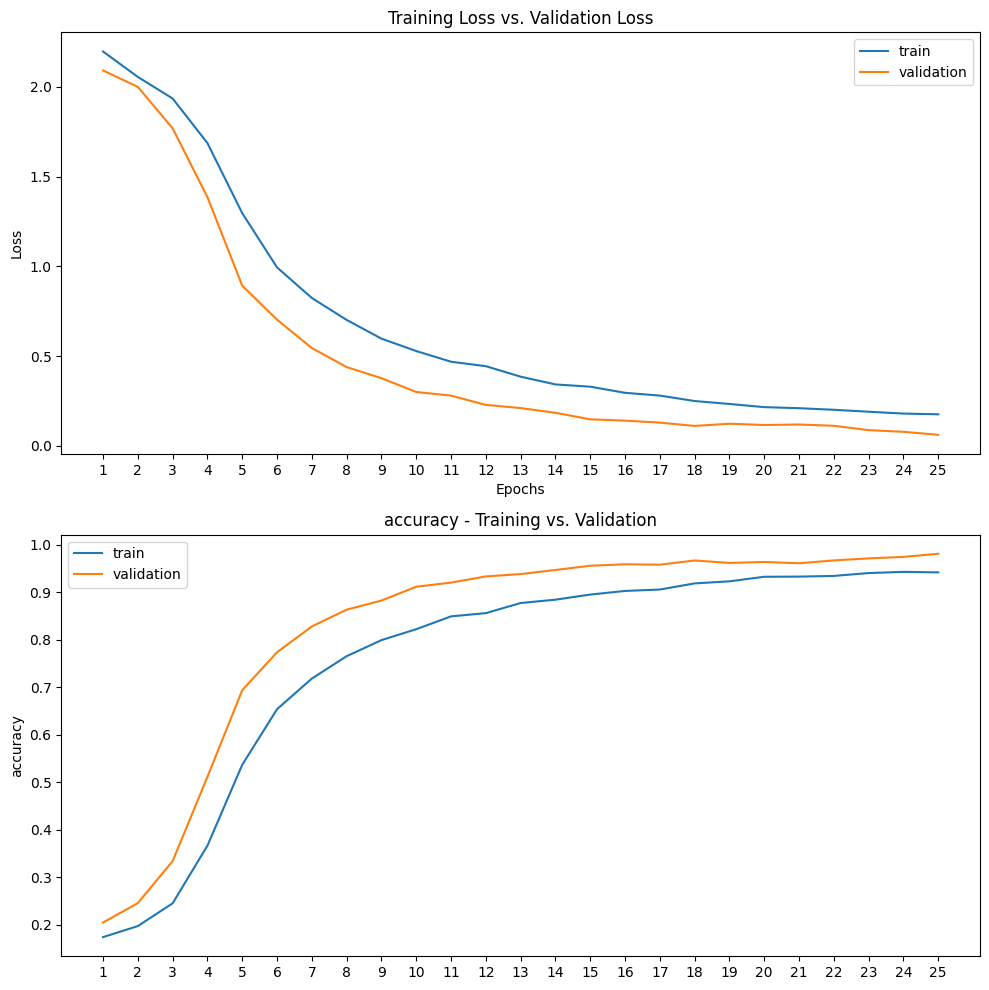

In [6]:
plot_history(history)

In [7]:
model = WikiSQLModel(base_model_type='bert-base-cased', attention_type='sqlnet', col_drop=True)
model = load_model(model, 'model_output/model.pth')

In [6]:
test_loader = WikiSQLDataset(type='test', model=model)

In [8]:
trainer = Trainer(model)

2023-02-03 15:16.15 [info     ] Config inputs.                 config={}
2023-02-03 15:16.15 [info     ] Loading the model.
2023-02-03 15:16.15 [warning  ] Testing only available. No datasets in arguments.
2023-02-03 15:16.15 [info     ] Training on device: cpu.
2023-02-03 15:16.15 [warning  ] Testing only available. No datasets in arguments.


In [9]:
test_loss, test_accuracy = trainer.test(model, test_loader)

2023-02-03 15:16.15 [info     ] Testing..


100%|██████████| 313/313 [00:05<00:00, 52.86batch/s, loss=0.859, metric=0.707] 


In [10]:
print(f'Model accuracy on test: {test_accuracy}')

Model accuracy on test: 0.7068690095846646
